The value of the maximum cut is: 19.0
The corresponding grouping scheme is as follows:
[0 0 1 0 1 1 0 1 0 1]
[0 1 0 1 0 0 1 0 1 0]
[1 0 1 0 1 1 0 1 0 1]
[1 1 0 1 0 0 1 0 1 0]


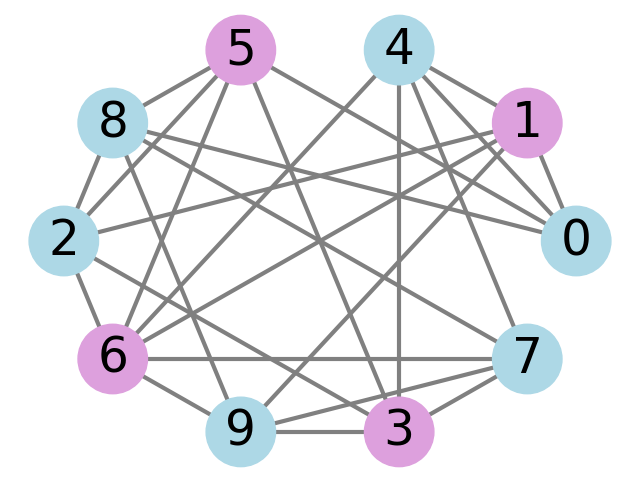

[array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1]),
 array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0])]

In [4]:
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import json

def objective_value(x, w):
    """计算割的值"""
    X = np.outer(x, (1 - x))
    return np.sum(w * X)

def find_solotion(qubits, graph_dict):
    """根据图字典求最大割值和对应分组方案，并绘制图形"""
    
    # 创建节点标签到整数索引的映射
    node_indices = {str(node): int(node) for node in graph_dict}  # 将字符串键转换为整数

    w = np.zeros((qubits, qubits))

    for node, edges in graph_dict.items():
        for adjacent, attr in edges.items():
            # 使用映射来访问数组
            u = node_indices[str(node)]  # 使用整数节点索引
            v = node_indices[str(adjacent)]
            w[u, v] = attr['weight']

    # 计算所有可能的分组，并求最大割值
    all_partitions = itertools.product([0, 1], repeat=qubits)

    max_cut_value = 0
    max_cuts = []

    for partition in all_partitions:
        partition = np.array(partition)
        cut_value = objective_value(partition, w)
        if cut_value > max_cut_value:
            max_cut_value = cut_value
            max_cuts = [partition]
        elif cut_value == max_cut_value:
            max_cuts.append(partition)

    print(f"The value of the maximum cut is: {max_cut_value}")
    print("The corresponding grouping scheme is as follows:")
    for cut in max_cuts:
        print(cut)

    # 使用 NetworkX 创建无向图
    G = nx.Graph()
    for node, edges in graph_dict.items():
        for adjacent, attr in edges.items():
            G.add_edge(str(node), str(adjacent), weight=attr['weight'])

    # 节点颜色设置
    example_partition = max_cuts[1]
    node_colors = ['lightblue' if example_partition[i] == 0 else 'plum' for i in range(qubits)]

    # 绘制图形
    plt.figure(figsize=(8, 6))
    pos = nx.circular_layout(G)  # 设置 seed 保证一致性
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2500)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray',width=3)
    nx.draw_networkx_labels(G, pos, font_size=35, font_color='black')
    plt.axis('off')
    # 保存图像到文件，指定分辨率为300 DPI
    plt.savefig('11.png', dpi=400, bbox_inches='tight')
    plt.show()
    
    return max_cuts

def load_graph_from_json(file_path):
    """从 JSON 文件加载图的字典"""
    with open(file_path, 'r') as f:
        graph_dict = json.load(f)
    return graph_dict

# 读取 JSON 文件
file_path = '/home/lzo/csy/整理_copy/CO_Instances/The_Unweighted_Max-Cut_Problem/10_nodes.json'  # 请替换为你的文件路径
graph_dict = load_graph_from_json(file_path)
num_nodes = len(graph_dict)  # 从字典中获得节点数量
find_solotion(num_nodes, graph_dict)

The value of the maximum cut is: 29.0
The corresponding grouping scheme is as follows:
[0 1 0 1 1 0 1 0]
[1 0 1 0 0 1 0 1]


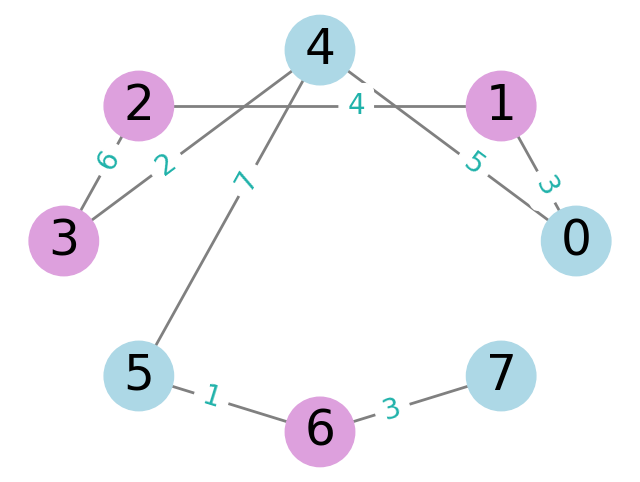

[array([0, 1, 0, 1, 1, 0, 1, 0]), array([1, 0, 1, 0, 0, 1, 0, 1])]

In [11]:
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import json

def objective_value(x, w):
    """计算割的值"""
    X = np.outer(x, (1 - x))
    return np.sum(w * X)

def find_solotion(qubits, graph_dict):
    """根据图字典求最大割值和对应分组方案，并绘制图形"""
    
    # 创建节点标签到整数索引的映射
    node_indices = {str(node): int(node) for node in graph_dict}  # 将字符串键转换为整数

    w = np.zeros((qubits, qubits))

    for node, edges in graph_dict.items():
        for adjacent, attr in edges.items():
            # 使用映射来访问数组
            u = node_indices[str(node)]  # 使用整数节点索引
            v = node_indices[str(adjacent)]
            w[u, v] = attr['weight']

    # 计算所有可能的分组，并求最大割值
    all_partitions = itertools.product([0, 1], repeat=qubits)

    max_cut_value = 0
    max_cuts = []

    for partition in all_partitions:
        partition = np.array(partition)
        cut_value = objective_value(partition, w)
        if cut_value > max_cut_value:
            max_cut_value = cut_value
            max_cuts = [partition]
        elif cut_value == max_cut_value:
            max_cuts.append(partition)

    print(f"The value of the maximum cut is: {max_cut_value}")
    print("The corresponding grouping scheme is as follows:")
    for cut in max_cuts:
        print(cut)

    # 使用 NetworkX 创建无向图
    G = nx.Graph()
    for node, edges in graph_dict.items():
        for adjacent, attr in edges.items():
            G.add_edge(str(node), str(adjacent), weight=attr['weight'])

    # 节点颜色设置
    example_partition = max_cuts[0]
    node_colors = ['lightblue' if example_partition[i] == 0 else 'plum' for i in range(qubits)]

    # 绘制图形
    plt.figure(figsize=(8, 6))
    pos = nx.circular_layout(G)  # 设置 seed 保证一致性
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2500)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray',width=2)
    nx.draw_networkx_labels(G, pos, font_size=35, font_color='black')

    # 生成边权重标签，只添加一次
    edge_labels = {}
    for node, edges in graph_dict.items():
        for adjacent, attr in edges.items():
            u, v = str(node), str(adjacent)  # 确保节点名称一致
            if (v, u) not in edge_labels:  # 确保每条边的权重只被添加一次
                edge_labels[(u, v)] = attr['weight']

    # 计算每条边的中点位置
    label_pos = {}
    for (u, v), label in edge_labels.items():
        label_pos[(u, v)] = ((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2)

    # 绘制边的权重标签
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=20, font_color='lightseagreen', label_pos=0.6)
    plt.axis('off')
    # 保存图像到文件，指定分辨率为300 DPI
    plt.savefig('11.png', dpi=400, bbox_inches='tight')
    plt.show()

    return max_cuts

def load_graph_from_json(file_path):
    """从 JSON 文件加载图的字典"""
    with open(file_path, 'r') as f:
        graph_dict = json.load(f)
    return graph_dict

# 读取 JSON 文件
file_path = '/home/lzo/csy/整理_copy/CO_Instances/The_Weighted_Max-Cut_Problem/8_nodes.json'  # 请替换为你的文件路径
graph_dict = load_graph_from_json(file_path)
num_nodes = len(graph_dict)  # 从字典中获得节点数量
find_solotion(num_nodes, graph_dict)